In [75]:
pip install faker pandas

Note: you may need to restart the kernel to use updated packages.


In [76]:
import pandas as pd
import random
from faker import Faker

# Initialize Faker
fake = Faker()

# Define the number of rows
num_rows = 500

# Generate synthetic data
data = {
    "Policy_ID": [fake.uuid4() for _ in range(num_rows)],
    "Customer_Age": [random.randint(18, 80) for _ in range(num_rows)],
    "Gender": [random.choice(["Male", "Female", "Other"]) for _ in range(num_rows)],
    "Policy_Type": [random.choice(["Health", "Auto", "Life", "Property"]) for _ in range(num_rows)],
    "Annual_Income": [round(random.uniform(20000, 200000), 2) for _ in range(num_rows)],
    "Claim_History": [random.randint(0, 10) for _ in range(num_rows)],
    "Fraudulent_Claim": [random.choice([0, 1]) for _ in range(num_rows)],
    "Premium_Amount": [round(random.uniform(500, 5000), 2) for _ in range(num_rows)],
    "Claim_Amount": [round(random.uniform(100, 10000), 2) for _ in range(num_rows)],
    "Risk_Score": [random.choice(["Low", "Medium", "High"]) for _ in range(num_rows)],
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("insurance_risk_claims_dataset.csv", index=False)

print("Dataset generated and saved as 'insurance_risk_claims_dataset.csv'")

Dataset generated and saved as 'insurance_risk_claims_dataset.csv'


In [77]:
df = pd.read_csv("insurance_risk_claims_dataset.csv")
df.head()


,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score
0,ad8d88ad-2059-4c0b-937b-d83b77ab4e5d,56,Other,Auto,195639.11,2,1,1595.57,8865.02,Medium
1,677259b4-00b9-4826-a407-016d2f6f9cf0,65,Female,Health,64522.07,7,0,1936.57,3391.28,High
2,0488ec5d-f4f1-45c9-b399-821e1a07e85d,61,Female,Life,108795.92,2,0,1464.20,2283.75,Medium
3,911647f5-c538-4a81-8372-acffc626802b,33,Other,Auto,117977.02,1,0,4162.51,617.08,High
4,b4a3b442-35a9-4290-b95d-c391d143a19a,42,Female,Auto,187521.40,1,1,637.94,2427.21,Low


In [78]:
df = df.drop('Fraudulent_Claim', axis=1)

In [79]:
df_encoded = pd.get_dummies(df, columns=['Policy_Type', 'Gender','Risk_Score'], drop_first=False)
df_encoded.head()

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_High,Risk_Score_Low,Risk_Score_Medium
0,ad8d88ad-2059-4c0b-937b-d83b77ab4e5d,56,195639.11,2,1595.57,8865.02,True,False,False,False,False,False,True,False,False,True
1,677259b4-00b9-4826-a407-016d2f6f9cf0,65,64522.07,7,1936.57,3391.28,False,True,False,False,True,False,False,True,False,False
2,0488ec5d-f4f1-45c9-b399-821e1a07e85d,61,108795.92,2,1464.20,2283.75,False,False,True,False,True,False,False,False,False,True
3,911647f5-c538-4a81-8372-acffc626802b,33,117977.02,1,4162.51,617.08,True,False,False,False,False,False,True,True,False,False
4,b4a3b442-35a9-4290-b95d-c391d143a19a,42,187521.40,1,637.94,2427.21,True,False,False,False,True,False,False,False,True,False


In [80]:
df_encoded.head()

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_High,Risk_Score_Low,Risk_Score_Medium
0,ad8d88ad-2059-4c0b-937b-d83b77ab4e5d,56,195639.11,2,1595.57,8865.02,True,False,False,False,False,False,True,False,False,True
1,677259b4-00b9-4826-a407-016d2f6f9cf0,65,64522.07,7,1936.57,3391.28,False,True,False,False,True,False,False,True,False,False
2,0488ec5d-f4f1-45c9-b399-821e1a07e85d,61,108795.92,2,1464.20,2283.75,False,False,True,False,True,False,False,False,False,True
3,911647f5-c538-4a81-8372-acffc626802b,33,117977.02,1,4162.51,617.08,True,False,False,False,False,False,True,True,False,False
4,b4a3b442-35a9-4290-b95d-c391d143a19a,42,187521.40,1,637.94,2427.21,True,False,False,False,True,False,False,False,True,False


In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = ['Annual_Income', 'Claim_Amount', 'Premium_Amount']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
df_encoded.head()


,Policy_ID,Customer_Age,Annual_Income,Claim_History,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_High,Risk_Score_Low,Risk_Score_Medium
0,ad8d88ad-2059-4c0b-937b-d83b77ab4e5d,56,0.976815,2,0.242735,0.885154,True,False,False,False,False,False,True,False,False,True
1,677259b4-00b9-4826-a407-016d2f6f9cf0,65,0.246657,7,0.319367,0.328333,False,True,False,False,True,False,False,True,False,False
2,0488ec5d-f4f1-45c9-b399-821e1a07e85d,61,0.493207,2,0.213213,0.215668,False,False,True,False,True,False,False,False,False,True
3,911647f5-c538-4a81-8372-acffc626802b,33,0.544334,1,0.819598,0.046125,True,False,False,False,False,False,True,True,False,False
4,b4a3b442-35a9-4290-b95d-c391d143a19a,42,0.931609,1,0.027529,0.230262,True,False,False,False,True,False,False,False,True,False


In [82]:
Q1 = df_encoded['Claim_Amount'].quantile(0.25)  # 25th percentile
Q3 = df_encoded['Claim_Amount'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_encoded[(df_encoded['Claim_Amount'] < lower_bound) | (df_encoded['Claim_Amount'] > upper_bound)]
print("Outliers detected using IQR:\n", outliers)

Outliers detected using IQR:
 Empty DataFrame
Columns: [Policy_ID, Customer_Age, Annual_Income, Claim_History, Premium_Amount, Claim_Amount, Policy_Type_Auto, Policy_Type_Health, Policy_Type_Life, Policy_Type_Property, Gender_Female, Gender_Male, Gender_Other, Risk_Score_High, Risk_Score_Low, Risk_Score_Medium]
Index: []


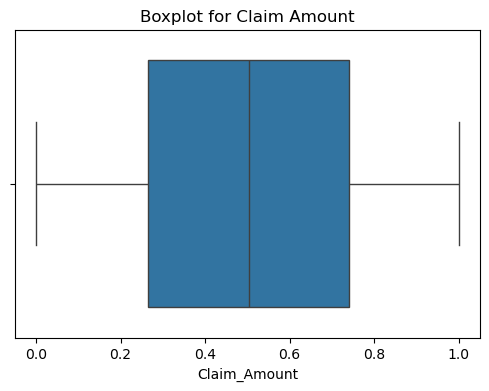

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x=df_encoded['Claim_Amount'])
plt.title("Boxplot for Claim Amount")
plt.show()

In [84]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # Assume 5% fraud
df_encoded['Anomaly'] = iso_forest.fit_predict(df_encoded[['Annual_Income', 'Claim_Amount', 'Premium_Amount']])
df_encoded['Anomaly'] = df_encoded['Anomaly'].apply(lambda x: 1 if x == -1 else 0)
# Display Anomalies (Fraudulent Claims)
#fraud_cases = df_encoded[df_encoded['Anomaly'] == 1]
#fraud_cases.head()
df_encoded.head()

,Policy_ID,Customer_Age,Annual_Income,Claim_History,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_High,Risk_Score_Low,Risk_Score_Medium,Anomaly
0,ad8d88ad-2059-4c0b-937b-d83b77ab4e5d,56,0.976815,2,0.242735,0.885154,True,False,False,False,False,False,True,False,False,True,0
1,677259b4-00b9-4826-a407-016d2f6f9cf0,65,0.246657,7,0.319367,0.328333,False,True,False,False,True,False,False,True,False,False,0
2,0488ec5d-f4f1-45c9-b399-821e1a07e85d,61,0.493207,2,0.213213,0.215668,False,False,True,False,True,False,False,False,False,True,0
3,911647f5-c538-4a81-8372-acffc626802b,33,0.544334,1,0.819598,0.046125,True,False,False,False,False,False,True,True,False,False,0
4,b4a3b442-35a9-4290-b95d-c391d143a19a,42,0.931609,1,0.027529,0.230262,True,False,False,False,True,False,False,False,True,False,1


In [85]:
df_encoded = df_encoded.drop('Policy_ID', axis=1)


In [86]:
df_encoded.head()

,Customer_Age,Annual_Income,Claim_History,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_High,Risk_Score_Low,Risk_Score_Medium,Anomaly
0,56,0.976815,2,0.242735,0.885154,True,False,False,False,False,False,True,False,False,True,0
1,65,0.246657,7,0.319367,0.328333,False,True,False,False,True,False,False,True,False,False,0
2,61,0.493207,2,0.213213,0.215668,False,False,True,False,True,False,False,False,False,True,0
3,33,0.544334,1,0.819598,0.046125,True,False,False,False,False,False,True,True,False,False,0
4,42,0.931609,1,0.027529,0.230262,True,False,False,False,True,False,False,False,True,False,1


In [87]:
df_encoded

,Customer_Age,Annual_Income,Claim_History,Premium_Amount,Claim_Amount,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Life,Policy_Type_Property,Gender_Female,Gender_Male,Gender_Other,Risk_Score_High,Risk_Score_Low,Risk_Score_Medium,Anomaly
0,56,0.976815,2,0.242735,0.885154,True,False,False,False,False,False,True,False,False,True,0
1,65,0.246657,7,0.319367,0.328333,False,True,False,False,True,False,False,True,False,False,0
2,61,0.493207,2,0.213213,0.215668,False,False,True,False,True,False,False,False,False,True,0
3,33,0.544334,1,0.819598,0.046125,True,False,False,False,False,False,True,True,False,False,0
4,42,0.931609,1,0.027529,0.230262,True,False,False,False,True,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,62,0.408223,1,0.896951,0.017148,False,True,False,False,False,False,True,False,False,True,0
496,34,0.355744,6,0.584766,0.769784,True,False,False,False,False,True,False,False,True,False,0
497,54,0.680693,4,0.988202,0.589174,False,True,False,False,False,False,True,False,False,True,0
498,41,0.279669,3,0.001609,0.960217,True,False,False,False,False,False,True,False,True,False,1


In [88]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_encoded = pd.DataFrame(data)

# Encoding Categorical Variables
label_encoder = LabelEncoder()

df_encoded["Policy_Type"] = label_encoder.fit_transform(df_encoded["Policy_Type"])
df_encoded["Gender"] = label_encoder.fit_transform(df_encoded["Gender"])
df_encoded["Risk_Score"] = label_encoder.fit_transform(df_encoded["Risk_Score"])

# Display Converted DataFrame
print(df_encoded)


                                Policy_ID  Customer_Age  Gender  Policy_Type  \
0    ad8d88ad-2059-4c0b-937b-d83b77ab4e5d            56       2            0   
1    677259b4-00b9-4826-a407-016d2f6f9cf0            65       0            1   
2    0488ec5d-f4f1-45c9-b399-821e1a07e85d            61       0            2   
3    911647f5-c538-4a81-8372-acffc626802b            33       2            0   
4    b4a3b442-35a9-4290-b95d-c391d143a19a            42       0            0   
..                                    ...           ...     ...          ...   
495  8d4ba2af-239c-406e-950f-2ffab1ec837b            62       2            1   
496  6aec2d31-57bd-4089-b440-0df5b6e479bc            34       1            0   
497  998403ec-5d2b-4732-a078-b5b293e21be1            54       2            1   
498  3e697a83-d0c9-4019-aaf5-1136b68d2bd8            41       2            0   
499  ecd220f2-ab56-41ef-b040-25a7b66b03a7            80       1            3   

     Annual_Income  Claim_History  Frau

In [89]:
import pandas as pd

# Assuming 'df' is your preprocessed DataFrame
df_encoded.to_csv("preprocessed_insurance_data.csv", index=False)

print("Preprocessed data saved successfully!")


Preprocessed data saved successfully!


In [90]:
from sklearn.ensemble import IsolationForest

# Anomaly detection using IsolationForest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # Assuming 5% fraud
df_encoded['Anomaly'] = iso_forest.fit_predict(df_encoded[['Annual_Income', 'Claim_Amount', 'Premium_Amount']])
df_encoded['Anomaly'] = df_encoded['Anomaly'].apply(lambda x: 1 if x == -1 else 0)  # Convert to 0 or 1 (fraud or not)

# View the dataset with anomaly labels
df_encoded.head()


,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Claim_History,Fraudulent_Claim,Premium_Amount,Claim_Amount,Risk_Score,Anomaly
0,ad8d88ad-2059-4c0b-937b-d83b77ab4e5d,56,2,0,195639.11,2,1,1595.57,8865.02,2,0
1,677259b4-00b9-4826-a407-016d2f6f9cf0,65,0,1,64522.07,7,0,1936.57,3391.28,0,0
2,0488ec5d-f4f1-45c9-b399-821e1a07e85d,61,0,2,108795.92,2,0,1464.20,2283.75,2,0
3,911647f5-c538-4a81-8372-acffc626802b,33,2,0,117977.02,1,0,4162.51,617.08,0,0
4,b4a3b442-35a9-4290-b95d-c391d143a19a,42,0,0,187521.40,1,1,637.94,2427.21,1,1


In [91]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Features and target column
X = df_encoded.drop(columns=['Anomaly', 'Policy_ID'])  # Drop 'Policy_ID' for model training
y = df_encoded['Anomaly']

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

# Split into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


Class distribution after SMOTE: Counter({0: 475, 1: 475})


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train RandomForest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        93
           1       0.95      0.95      0.95        97

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

AUC-ROC Score: 0.9473450836936038
Confusion Matrix:
 [[88  5]
 [ 5 92]]


In [93]:
import pickle

# Assuming 'rf_model' is your trained RandomForest model

# Save the trained model using pickle
with open("insurance_risk_claims_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Model saved successfully as 'insurance_risk_claims_model.pkl'")


Model saved successfully as 'insurance_risk_claims_model.pkl'
